In [2]:
import numpy as np
import pylab as plt
%matplotlib inline

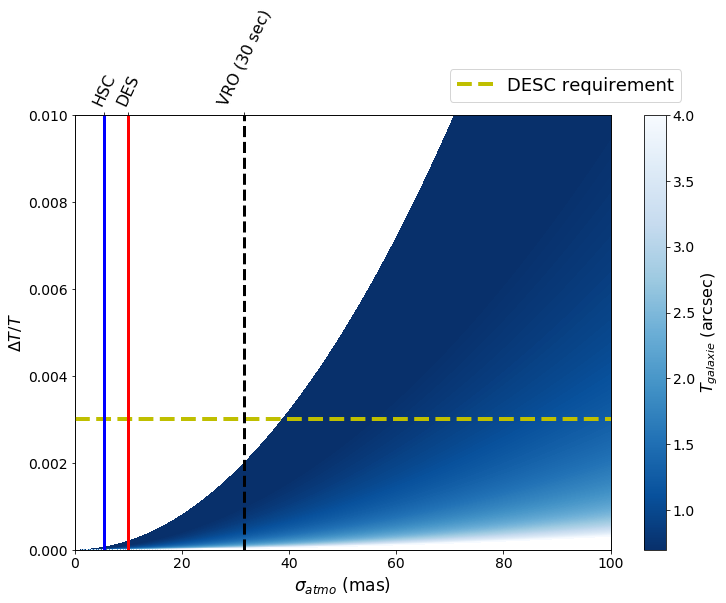

In [4]:
VAR_ASTRO_DES = 100
VAR_ASTRO_HSC = 30
VAR_ASTRO_VRO = 1000

# je dis juste qu'au final ce que tu mesures c'est la 
# somme quadratique entre la taille de la galaxie et la 
# dispersion de l'atmosphere (c'est en arcsec). 
# En gros je suppose que tout est gaussien par simplicité.
def theory_size_impact(sigma_galaxie, sigma_atmo):
    return np.sqrt(sigma_galaxie**2 + sigma_atmo**2)

# Je calcul le delta_T / T car cela me semble etre 
# la variable interessante (le T de la galaxie est en arcsec).
def dT_sur_T(T_gal, sigma_atmo):
    T_gal_obs = theory_size_impact(T_gal, sigma_atmo)
    dT = T_gal_obs - T_gal
    return dT / T_gal

# dispersion des residus astrometriques 
# provoqué par l'atmosphere (en arcsec)
N = 201
sigma_atmo = np.linspace(1, 101, N) * 1e-3
T_galaxie = np.linspace(0.5, 4., N)

# je fais la grille qui permet d'avoir un 3d plot
SIGMA_ATMO, T_GAL = np.meshgrid(sigma_atmo, T_galaxie)
DT_T = dT_sur_T(T_GAL, SIGMA_ATMO)


plt.figure(figsize=(12,8))
plt.ticklabel_format(style='plain', axis='both')



plt.pcolor(SIGMA_ATMO*1000, DT_T, T_GAL,cmap='Blues_r',vmin=0.7,vmax=4., zorder=10)

plt.plot(np.linspace(0, 101, N), np.ones(N) * 0.003, 'y--', lw=4, zorder=100, label='DESC requirement')


ylim = plt.ylim()
plt.plot([np.sqrt(VAR_ASTRO_HSC), np.sqrt(VAR_ASTRO_HSC)], ylim, 'b', lw=3, zorder=100)
plt.plot([np.sqrt(VAR_ASTRO_DES), np.sqrt(VAR_ASTRO_DES)], ylim, 'r', lw=3, zorder=100)
plt.plot([np.sqrt(VAR_ASTRO_VRO), np.sqrt(VAR_ASTRO_VRO)], ylim, 'k--', lw=3, zorder=100)

cb = plt.colorbar()
cb.set_label('$T_{galaxie}$ (arcsec)', fontsize=16)
cb.ax.tick_params(labelsize=14)
plt.yticks(size=14)
plt.xticks(size=14)
plt.xlabel('$\sigma_{atmo}$ (mas)', fontsize=17)
plt.ylabel('$\Delta T / T$', fontsize=16)
plt.ylim(0, 0.01)
plt.xlim(0, 100)
plt.legend(loc=(0.7, 1.03), fontsize=18)


ax2 = plt.gca().twiny()
ax2.set_xlim(0, 100)
ax2.set_xticks([np.sqrt(VAR_ASTRO_HSC), np.sqrt(VAR_ASTRO_DES), np.sqrt(VAR_ASTRO_VRO)])#, ['HSC', 'DES'])

ax2.set_xticklabels(['HSC', 'DES', 'VRO (30 sec)'], rotation=65, size=16)
plt.savefig('../../../../../Desktop/astro_mbias.png')